# Explore Data and Basic Cleaning

https://www.kaggle.com/yashvi/word-embeddings

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

seed_ = 20200218
np.random.seed(seed_)
tf.random.set_seed(seed_)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid",
              context="paper",
              font_scale=1.25,
              rc={
                  "figure.figsize": (10.5, 4.5),
                  "figure.dpi": 150,
                  "grid.alpha": 0.1,
                  "grid.color": "#1b262c",
                  "grid.linewidth": 0.5,
                  "font.family": "Operator Mono"
              })

_30k = ["#202f66", "#ff7048", "#7f68d0", "#f3d36e", "#d869ab", "#48ADA9", "#1b262c"]
sns.set_palette(_30k)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import string
from bs4 import BeautifulSoup

# Load Data

In [4]:
train_df = pd.read_csv("./data/Corona_NLP_train.csv", encoding="latin_1", parse_dates=["TweetAt"])
test_df = pd.read_csv("./data/Corona_NLP_test.csv", encoding="latin_1", parse_dates=["TweetAt"])

In [5]:
train_df.shape, test_df.shape

((41157, 6), (3798, 6))

# Check for Null Value

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
train_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       3798 non-null   int64         
 1   ScreenName     3798 non-null   int64         
 2   Location       2964 non-null   object        
 3   TweetAt        3798 non-null   datetime64[ns]
 4   OriginalTweet  3798 non-null   object        
 5   Sentiment      3798 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 178.2+ KB


In [9]:
test_df.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

# Class

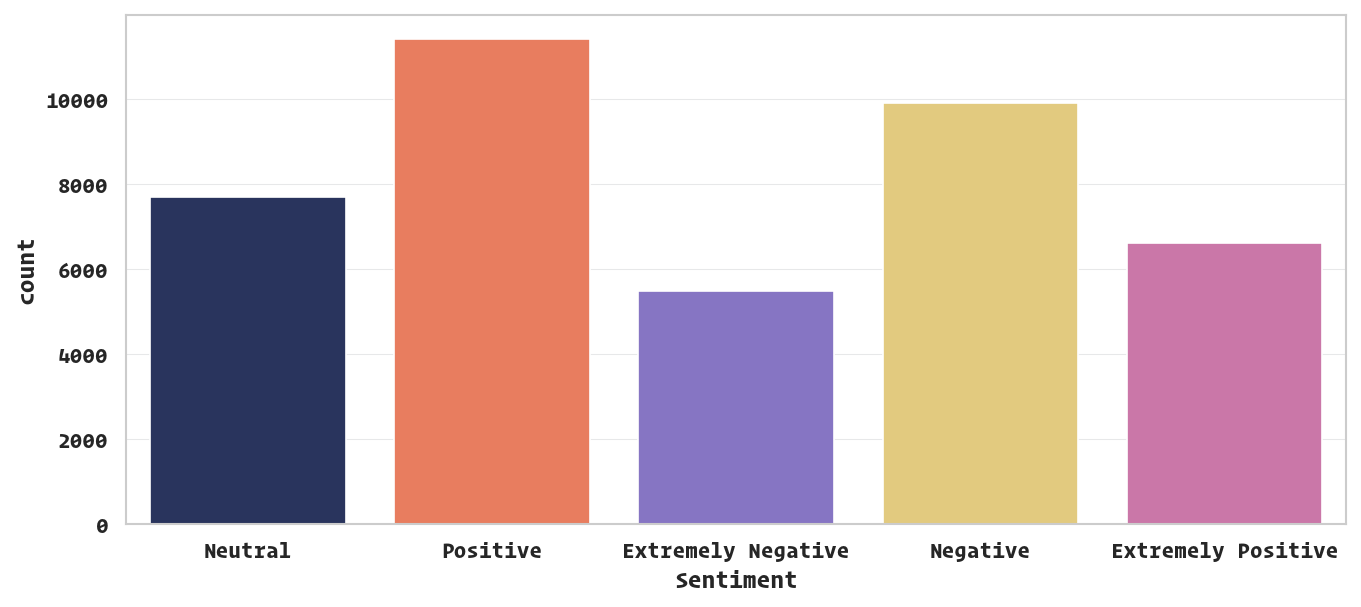

In [10]:
sns.countplot(x='Sentiment', data=train_df)
plt.show()

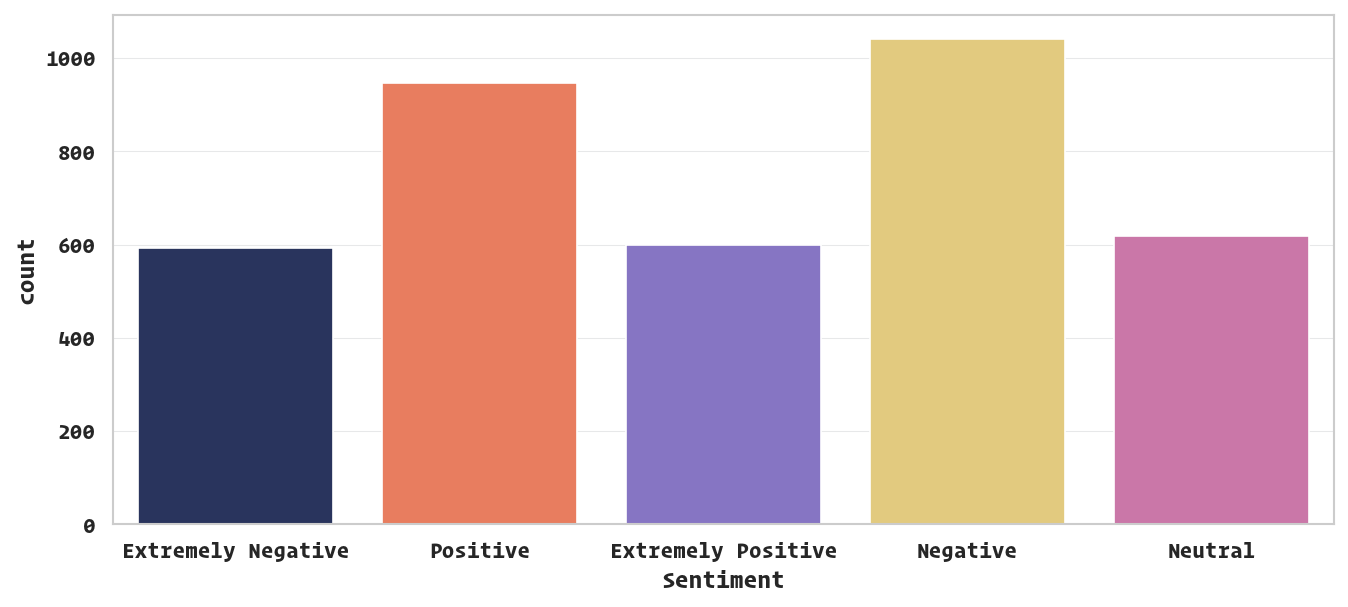

In [11]:
sns.countplot(x='Sentiment', data=test_df)
plt.show()

In [12]:
def change_sentiment(text):
    if 'positive' in text.lower():
        text = 'positive'
    elif 'negative' in text.lower():
        text = 'negative'
    else:
        text = 'neutral'
    return text

In [13]:
train_df['Sentiment_new'] = train_df['Sentiment'].apply(change_sentiment)
test_df['Sentiment_new'] = test_df['Sentiment'].apply(change_sentiment)

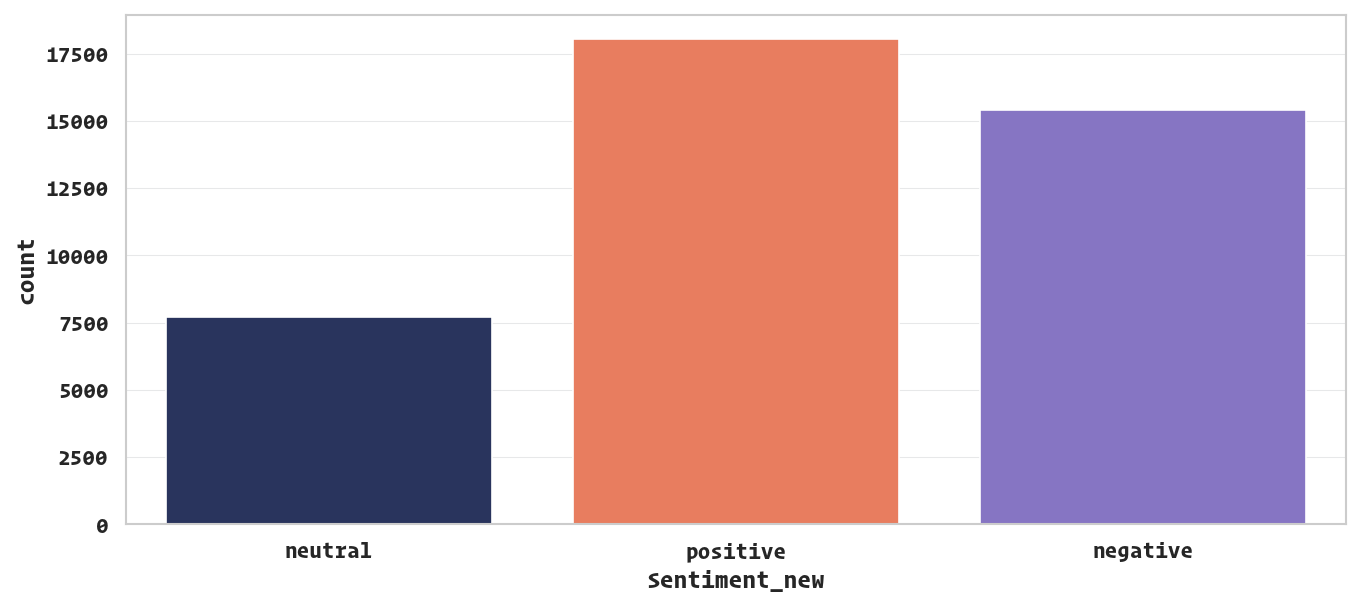

In [14]:
sns.countplot(x='Sentiment_new', data=train_df)
plt.show()

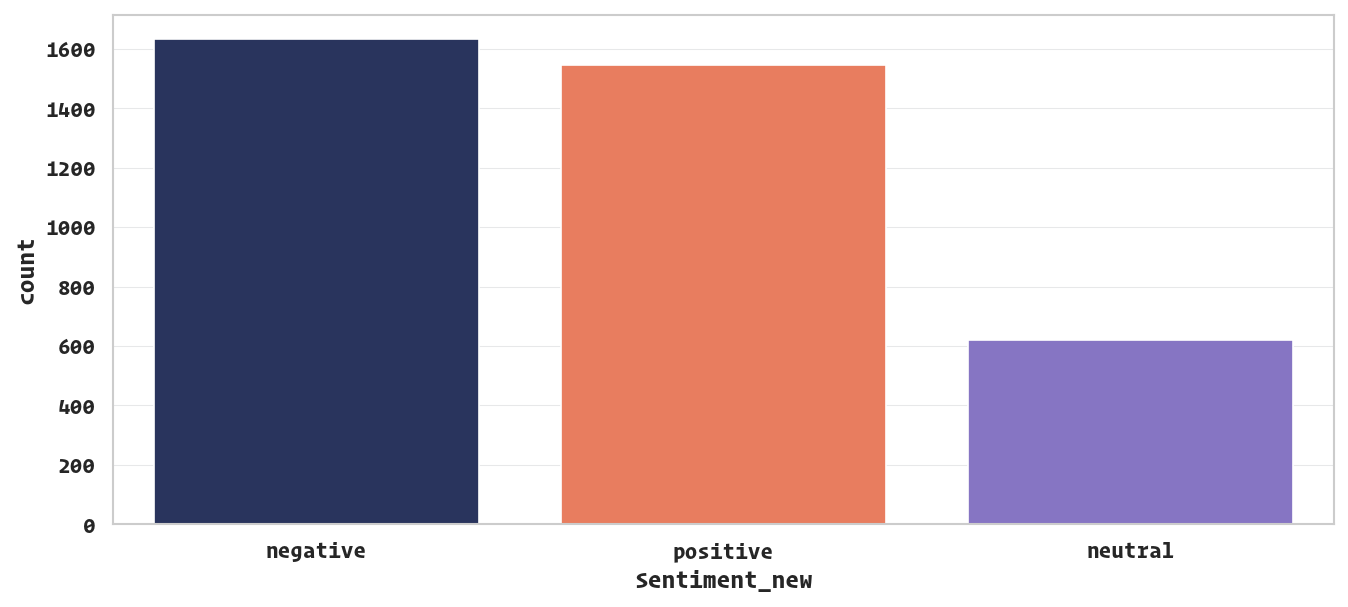

In [15]:
sns.countplot(x='Sentiment_new', data=test_df)
plt.show()

# Preprocessing // clean tweet

https://www.kaggle.com/himanshutripathi/covid-19-tweets-analysis-97-accuracy

In [16]:
def clean_text(text):
    
    soup = BeautifulSoup(text)
    text = soup.text
    
    # clean escape character
    text = re.sub(r"[\r|\n|\t]", "", text)
    
    # clean url
    text = re.sub(r"http\S+", "", text)
    
    # clean mention
    text = re.sub(r"@\w+", "", text)
    
    # clean hashtag
    text = re.sub(r"#\w+", "", text)
    
    # clean html tag
    text = re.sub(r"<.*?>", "", text)
    
    return text

In [17]:
train_df['cleaned_text'] = train_df['OriginalTweet'].apply(clean_text)
test_df['cleaned_text'] = test_df['OriginalTweet'].apply(clean_text)

In [18]:
train_df.to_csv("./cleaned/train.csv", index=False, encoding="utf-8")
test_df.to_csv("./cleaned/test.csv", index=False, encoding="utf-8")